# Day 10 - Exercise 4

In [3]:
import pandas as pd

import matplotlib.pyplot as plt


#-------------------- Import <Titles> Data-Set --------------------#

titles = pd.read_csv('titles.csv')

print('\n#---------- Titles Data-Set Glimpse ----------#')

titles.head()


#---------- Titles Data-Set Glimpse ----------#


,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
#-------------------- Import <Cast> Data-Set --------------------#

cast = pd.read_csv('cast.csv')

print('\n#---------- Cast Data-Set Glimpse ----------#')

cast.head(10)


#---------- Cast Data-Set Glimpse ----------#


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


# 1. Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years? 

In [3]:
superman_batman_roles = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

#-------------------- Group by years --------------------#

character_counts = superman_batman_roles.groupby(['year', 'character'])['title'].count().unstack(fill_value=0)

#-------------------- More Superman than Batman --------------------#

superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]

#-------------------- Total Superman Years --------------------#

total_superman_years = len(superman_years)

In [7]:
print(f"\n Total number of years that have been only 'Superman years' are:", total_superman_years)



 Total number of years that have been only 'Superman years' are: 11


# 2. How many years have been "Batman years". with more Batman characters than Superman characters? 

In [8]:
superman_batman_roles = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

#-------------------- Group by years --------------------#

character_counts = superman_batman_roles.groupby(['year', 'character'])['title'].count().unstack(fill_value=0)

#-------------------- More Batman than Superman --------------------#

batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]

#-------------------- Total Batman Years --------------------#

total_batman_years = len(batman_years)

In [10]:
print(f"\n Total number of years that have been only 'Batman years' are:", total_batman_years)



 Total number of years that have been only 'Batman years' are: 27


# 3. Plot the number of actor roles each year and the number of actress roles each year over the history of film. 

In [11]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]


#-------------------- Group by Actors / Actresses --------------------#


total_roles = actor_actress_roles.groupby(['year', 'type'])['title'].count().unstack(fill_value=0)

<Figure size 800x800 with 0 Axes>

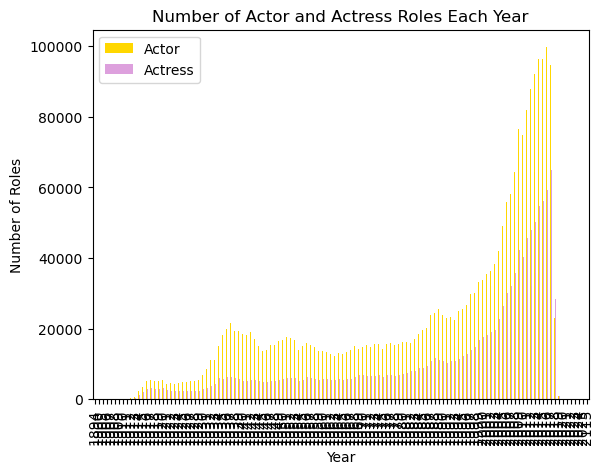

In [16]:
plt.figure(figsize=(8, 8))

total_roles.plot(kind='bar', color=['gold', 'plum'])

plt.title('Number of Actor and Actress Roles Each Year')

plt.xlabel('Year')

plt.ylabel('Number of Roles')

plt.legend(['Actor', 'Actress'])

plt.show()

# 4. Plot the number of actor roles each year and the number of actress roles each year. but this time as a kind='area' plot. 

In [17]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]


#-------------------- Group by Actors / Actresses --------------------#


roles_by_year = actor_actress_roles.groupby(['year', 'type'])['title'].count().unstack(fill_value=0)

<Figure size 800x800 with 0 Axes>

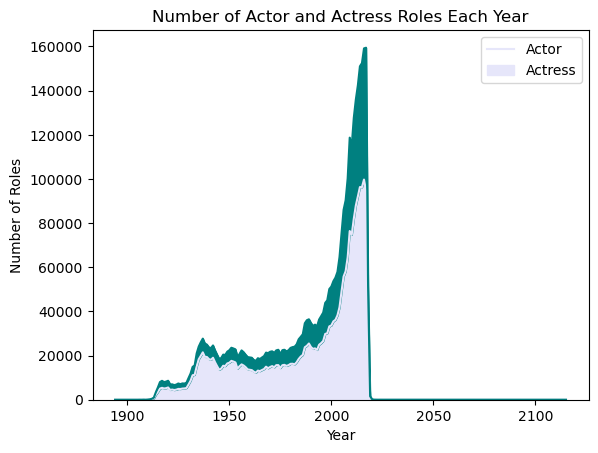

In [32]:
plt.figure(figsize=(8, 8))

roles_by_year.plot(kind='area', color=['lavender', 'teal'])

plt.title('Number of Actor and Actress Roles Each Year')

plt.xlabel('Year')

plt.ylabel('Number of Roles')

plt.legend(['Actor', 'Actress'])

plt.show()

# 5. Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film. 

In [23]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]


#-------------------- Group by Actors / Actresses --------------------#


total_roles = actor_actress_roles.groupby(['year', 'type'])['title'].count().unstack(fill_value=0)


#-------------------- Difference between Actors and Actress --------------------#


roles_difference = total_roles['actor'] - total_roles['actress']

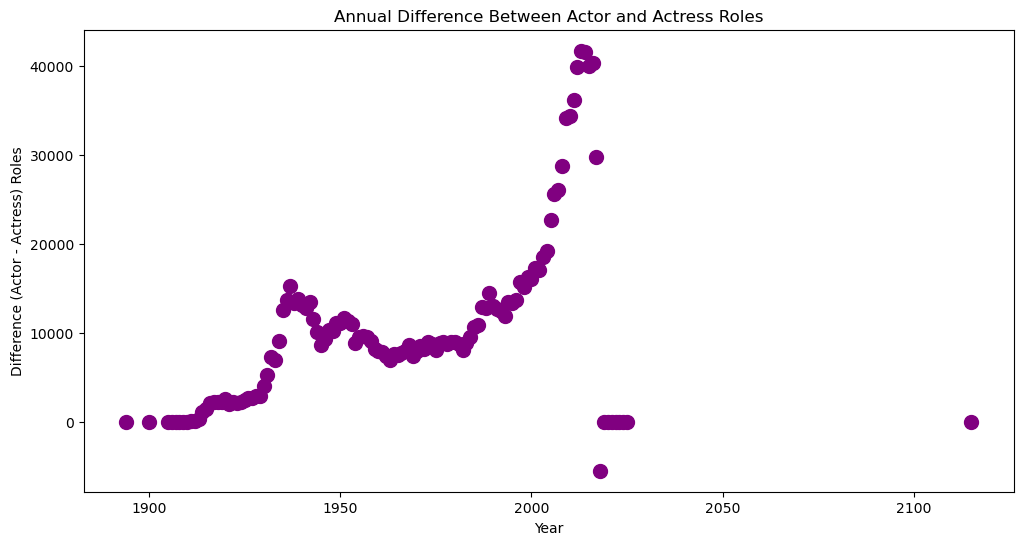

In [29]:
plt.figure(figsize=(12, 6))

plt.scatter(roles_difference.index, roles_difference.values, color='purple', marker='o', s=100)

plt.title('Annual Difference Between Actor and Actress Roles')

plt.xlabel('Year')

plt.ylabel('Difference (Actor - Actress) Roles')

plt.show()

# 6. Plot the fraction of roles that have been 'actor' roles each year in the history of film. 

In [30]:
roles_each_year = cast.groupby(['year', 'type'])['title'].count().unstack(fill_value=0)


#-------------------- Fraction Calculator --------------------#


total_roles_per_year = roles_each_year['actor'] + roles_each_year['actress']

fraction_actor_roles = roles_each_year['actor'] / total_roles_per_year

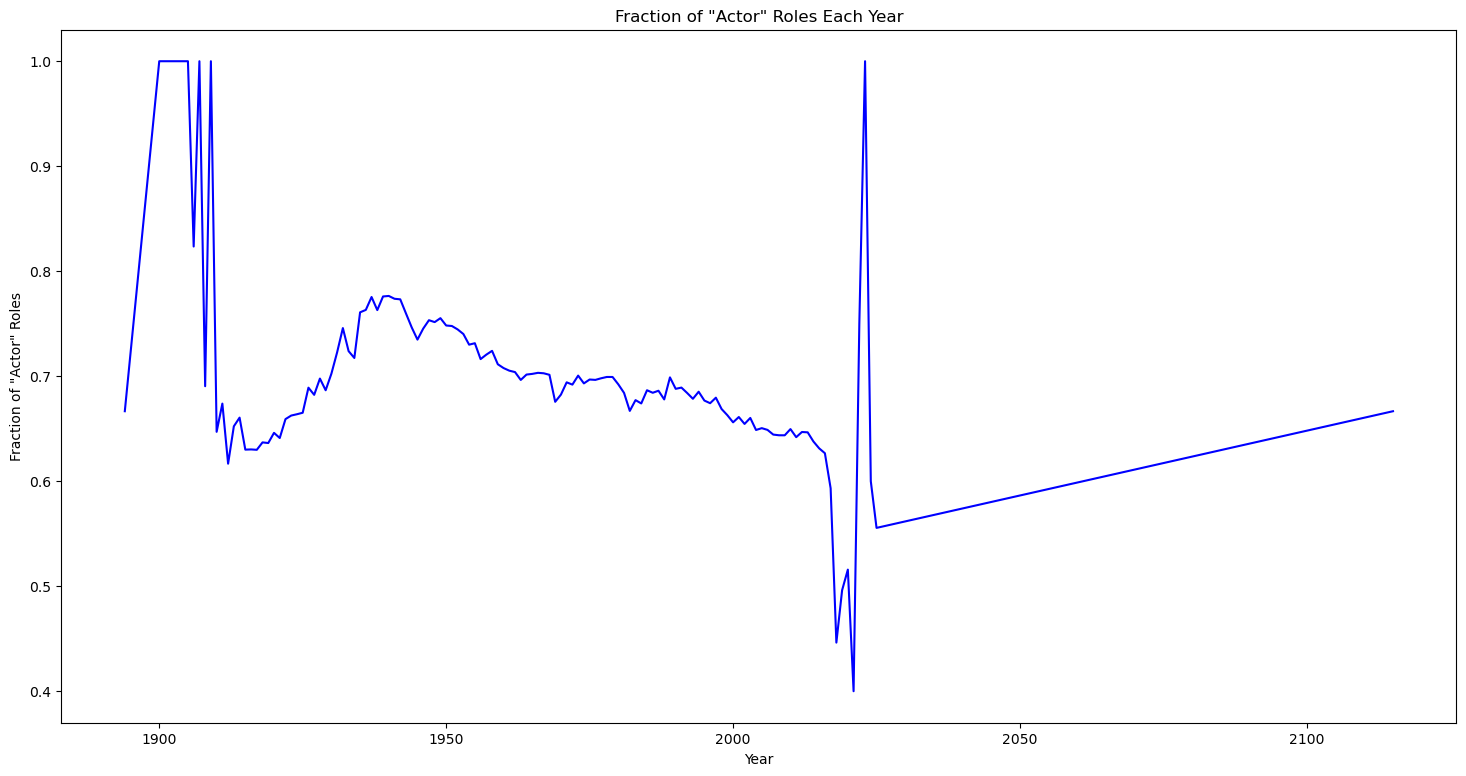

In [34]:
plt.figure(figsize=(18, 9))

fraction_actor_roles.plot(kind='line', color='blue', markersize=5)

plt.title('Fraction of "Actor" Roles Each Year')

plt.xlabel('Year')

plt.ylabel('Fraction of "Actor" Roles')

plt.show()

# 7. Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film. 

In [37]:
supporting_roles = cast[(cast['n'] == 2)]


#-------------------- Group by Roles  --------------------#


byYear_supporting_roles = supporting_roles.groupby(['year', 'type'])['title'].count().unstack(fill_value=0)

In [38]:
#-------------------- Fraction of (Actor Supporting Roles)  --------------------#

total_supporting_roles_per_year = byYear_supporting_roles['actor'] + byYear_supporting_roles['actress']

fraction_actor_supporting_roles = byYear_supporting_roles['actor'] / total_supporting_roles_per_year

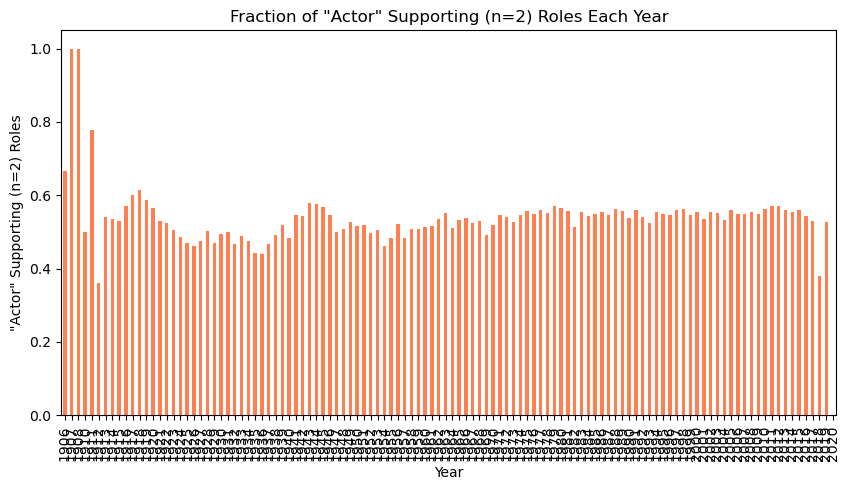

In [39]:
plt.figure(figsize=(10, 5))

fraction_actor_supporting_roles.plot(kind='bar', color='coral')

plt.title('Fraction of "Actor" Supporting (n=2) Roles Each Year')

plt.xlabel('Year')

plt.ylabel('"Actor" Supporting (n=2) Roles')

plt.show()

# 8. Build a plot with a line for each rank n=1 through n=3. where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film. 

<Axes: xlabel='year'>

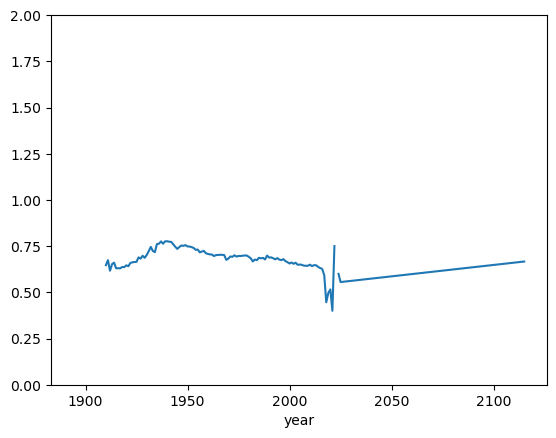

In [6]:
c = cast

c = c.groupby(['year', 'type']).size()

c = c.unstack('type')

(c.actor / (c.actor + c.actress)).plot(ylim=[0,2])